### Importing 

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Downlading the Training Data

Downloading the data from here

'https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1 (24.8 MB)

 

In [2]:
df = pd.read_csv('https://zenodo.org/record/5550238/files/osdg-community-dataset-v21-09-30.csv?download=1')

In [6]:
print(df.shape)
df.head(10)

(32121, 7)


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000
5,10.1787/5js4xfgl4ks0-en,000b54717f2deea5d99055b4c1c2bf5a,These findings are consistent with previous wo...,10,2,5,0.428571
6,10.1787/9789264285712-7-en,000bc99895142f9b6795ddf402e16e9a,"Each section states the economic principle, re...",6,1,3,0.500000
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000
8,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000
9,10.1787/1826beee-en,0014f8ae09b458434c107236c86c2c38,"To encourage N runoff reductions by farmers, t...",6,1,2,0.333333


We have around 32 K rows ; but we will use whose those data rows which have good Scores of Agreement,Labels_Positive and Labels_negative

In [4]:
df_osdg = df.query('agreement >= .6 and labels_positive > labels_negative').copy()
df_osdg.shape

(17233, 7)

Now we are left with around 17K Rows; these data rows will be used to Train Our Model for Sustainable Development Goals Classification

In [18]:
df_osdg.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000
8,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000
11,10.1787/9789264310278-en,001f1aee4013cb098da17a979c38bc57,Prescription rates appear to be higher where l...,8,0,3,1.000000


### Visualising the training data

In [14]:
counts =[]
for i in range(1,18):
    #print((df_osdg.sdg==i).sum())
    counts.append((i,(df_osdg.sdg==i).sum()))
    

In [15]:

#making pandas df 
df_count = pd.DataFrame(counts,columns=['sdg','occurance'])

In [16]:
df_count

,sdg,occurance
0,1,1146
1,2,827
2,3,1854
3,4,2324
4,5,2286
5,6,1343
6,7,1589
7,8,859
8,9,688
9,10,437


Text(0.5, 0, 'category')

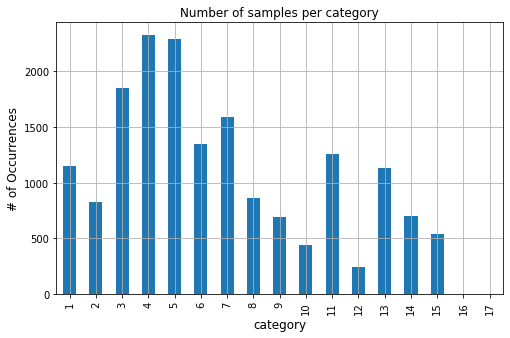

In [17]:
df_count.plot(x='sdg', y='occurance', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of samples per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In our Training data we have majority of data from the 3rd , 4th and 5th SDG Category and least data from 10th and 12th SDG Category .The training data of SDG category 16 and 17th is Not Available so our Trained Model will not Predict those Categories

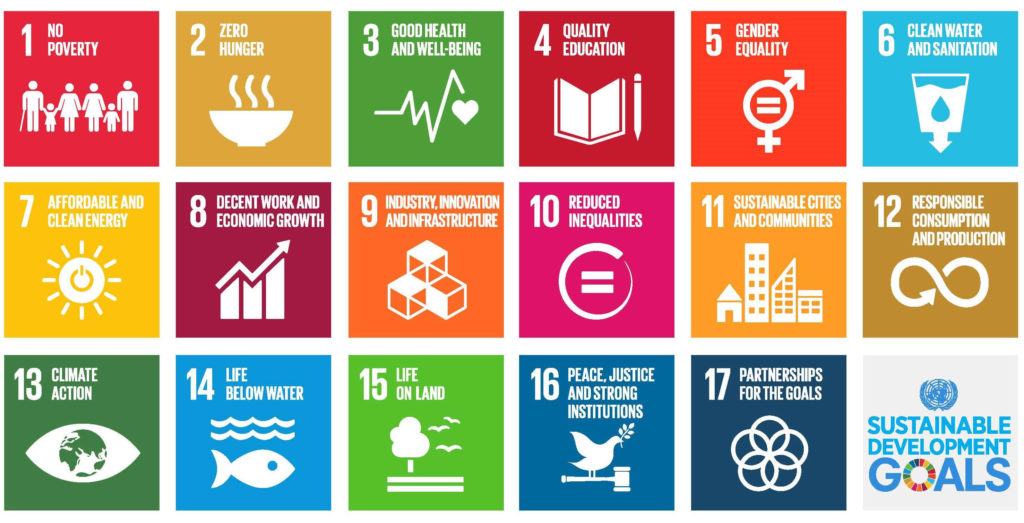

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_osdg.text)
print(X_train_counts.shape)

(17233, 34963)


There are total 17233 documents (Data Rows) and 34963 unique words 

Printing a sample count vectorizer Row

In [20]:
#print(X_train_counts[30000].todense().shape)
print(X_train_counts[2])

  (0, 31537)	10
  (0, 22402)	6
  (0, 16033)	2
  (0, 2761)	4
  (0, 31822)	1
  (0, 22563)	1
  (0, 17193)	1
  (0, 22358)	1
  (0, 18834)	1
  (0, 26973)	1
  (0, 30004)	1
  (0, 20829)	3
  (0, 25702)	1
  (0, 25691)	4
  (0, 34101)	3
  (0, 2521)	1
  (0, 6722)	1
  (0, 20022)	1
  (0, 28250)	1
  (0, 21417)	1
  (0, 23375)	1
  (0, 3691)	1
  (0, 22083)	1
  (0, 27451)	1
  (0, 4255)	1
  (0, 20733)	1
  (0, 20067)	1
  (0, 18993)	1
  (0, 3690)	1
  (0, 20823)	1
  (0, 10267)	1
  (0, 32728)	1
  (0, 30704)	1
  (0, 20494)	2
  (0, 14829)	2
  (0, 10750)	1
  (0, 25011)	1
  (0, 17250)	1
  (0, 33321)	1
  (0, 2230)	1
  (0, 28336)	1


Converting the Count Vectorizer to TF-IDF . 

TF-IDF is intended to reflect how relevant a term is in a given document.

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(17233, 34963)

Sample TF-IDF Row , each word inside a document is rep. by its TF-IDF Score 

(More the importance of a word in a particular Document is , More is its TF-IDF Score) 

In [27]:
print(X_train_tfidf[2])


  (0, 34101)	0.20543537480057322
  (0, 33321)	0.06499287143044565
  (0, 32728)	0.07580761581582826
  (0, 31822)	0.02306991903992704
  (0, 31537)	0.20893039157030485
  (0, 30704)	0.14304364974325334
  (0, 30004)	0.14611751851799956
  (0, 28336)	0.07105593625118113
  (0, 28250)	0.11160348833589029
  (0, 27451)	0.12328126836614416
  (0, 26973)	0.084136562089912
  (0, 25702)	0.12364652766766784
  (0, 25691)	0.286915865889028
  (0, 25011)	0.12537606256574377
  (0, 23375)	0.13589143081785282
  (0, 22563)	0.03672685368466842
  (0, 22402)	0.12941143432309057
  (0, 22358)	0.1774423014959518
  (0, 22083)	0.19161991821565805
  (0, 21417)	0.1036538866223436
  (0, 20829)	0.4600023567515462
  (0, 20823)	0.11286908644101921
  (0, 20733)	0.18017354957395704
  (0, 20494)	0.19237171395144043
  (0, 20067)	0.2057975349353643
  (0, 20022)	0.14973645521222256
  (0, 18993)	0.07483591255232679
  (0, 18834)	0.2057975349353643
  (0, 17250)	0.06768674971449692
  (0, 17193)	0.12154684192736977
  (0, 16033)	0.0456

In [30]:
from sklearn.naive_bayes import MultinomialNB
NBModel = MultinomialNB().fit(X_train_tfidf, df_osdg.sdg==5)
    

NBModel is  our Multiclass Naive Byes SDG classification Model prepared from the training data and its TF-IDF scores . But to run this Model each time we have to calculate a TF-IDF scores before getting output from the Model . 

So its Better to make a **Pipeline** , where in one go our data will get clean , we get TF-IDF Scores and can train on that .Then  To test our Model we just require to pass text  to our Model and it will predict the SDG Category it belongs to ; in a Higher to Lower Probability Order.

In [31]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfTransformer(),MultinomialNB())

A Sample CSR report to see how our model Predicts

In [33]:
testing= ["""34-15_CSR.txt
Program 
wise
Amount Spent on the 

Cumulative 
Expenditure 
upto the 
reporting 
period
Amount 
spent: Direct 
or through 
implementing 
agency**
1. Direct 
Expenditure
2. Overheads*
Promoting education 
by providing 
educational materials, 
setting up of 

libraries, toy libraries,  
scholarships, coaching 
classes, computer 

hardware and software 
for smart classes, 
building infrastructure 

at schools, organising 
workshops for 
enhancing skills, etc.
Education
Tamil Nadu 

(Cuddalore, Tiruvallur 
District) Maharashtra 
(Khandala, Satara 

District, Bhandup, 
Mumbai District) 
Gujarat (Ankleshwar, 

Bharuch District), 
Uttar Pradesh (Kasna, 
Gautam Buddha 

Nagar  District), 
Haryana (Rohtak 
District)
5.53
4.14
0.20
4.34
Direct and 

through 
implementing 
agency
Promoting healthcare 

and sanitation by 

conducting projects 
and programs, making 
available safe drinking 

water to community, 
preventive healthcare 
and medical camps, 

infrastructure 
support for cancer 
diagnosis, calibration 

of healthcare 
equipment at hospitals, 
construction of sanitary 


Sector in 

which the 



covered
Location where 






to unemployed  
youth and painting 

applicators/contractors
Vocational 



(Bhubaneshwar 

District), Uttaranchal 

(Dehradun District) 

Chandigarh and 



sustainability through 
water recharge & 
conservation projects, 

rain water harvesting, 
water - desilting 
and reclamation in 

villages, Integrated 
Water Resources 
Management in 

Community Watershed
Water
Tamil Nadu 

/NGOs to execute the said projects and programs 
and incur expenditure in accordance with Section 135 of 
the Companies Act, 2013 and the Companies (Corporate 
Social Responsibility Policy) Rules, 2014.
7.
 
The CSR Committee confirms that the implementation and 
monitoring of the CSR Policy is in compliance with the CSR 
objectives and Policy of your Company.
K.B.S. Anand

Managing Director & CEO
Mahendra Choksi

Chairman
CSR Committee
Place: Mumbai 
Date: 18
th
 May, 2015
6.
 
Your Company is committed to focus on inclusive growth and 

improve lives by contributing towards communities around 
which it operates. This dedicated commitment towards 
inclusive growth is manifested through the Company™s CSR 

initiatives undertaken around the manufacturing facilities 
as well as across many cities in India during the financial 
year 2014-15. The overall CSR Expenditure has increased 

from 
`
"""]

Training our Pipelined Model

In [50]:
import nltk

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

Spliting our data into test and train. Keeping 1/3rd of data as test data and remaning 2/3rd of Data as training Data

In [ ]:
train, test = train_test_split(df_osdg, random_state=42, test_size=0.33, shuffle=True)

In [ ]:

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [57]:
for i in range (1,16):
    
    print("Category Goal ",i)
    NB_pipeline.fit(train.text, train.sdg==i)
    NB_predicted2 = NB_pipeline.predict(train.text)
    print('Train accuracy is {}'.format(accuracy_score(train.sdg==i,NB_predicted2)))
    NB_predicted2 = NB_pipeline.predict(test.text)
    print('Test accuracy is {}'.format(accuracy_score(test.sdg==i,NB_predicted2)))

Category Goal  1
Train accuracy is 0.931837865927594
Test accuracy is 0.9356426938631968
Category Goal  2
Train accuracy is 0.9524510653040014
Test accuracy is 0.9502373835062423
Category Goal  3
Train accuracy is 0.898406374501992
Test accuracy is 0.8948478987163707
Category Goal  4
Train accuracy is 0.8865407933483458
Test accuracy is 0.8802532090733252
Category Goal  5
Train accuracy is 0.8775333448813442
Test accuracy is 0.8712853877263935
Category Goal  6
Train accuracy is 0.9221375368092846
Test accuracy is 0.9249164761737295
Category Goal  7
Train accuracy is 0.9091460245972631
Test accuracy is 0.9080358712853878
Category Goal  8
Train accuracy is 0.948380391477568
Test accuracy is 0.9526991383857921
Category Goal  9
Train accuracy is 0.9604191927940412
Test accuracy is 0.9586776859504132
Category Goal  10
Train accuracy is 0.974016975575957
Test accuracy is 0.9757341304730086
Category Goal  11
Train accuracy is 0.9275073618569202
Test accuracy is 0.9250923158079831
Category Goa

In [76]:
NB_pipeline.fit(train.text, train.sdg)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

Dumping our trained Model in Pickle Format ,  we can download it and can deploy our Naive Bayes SDG Multiclass Label Model. 

In [77]:
import pickle
model_file = "model.pickle"
with open(model_file,'wb') as f:
    pickle.dump(NB_pipeline, f)

In [102]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})


Using Sample report to see how our model predicts various categories of various SDG.

In [107]:
test_cls = NB_pipeline.predict_proba(testing)
result = test_cls.tolist()
test_res = result[0]

In [108]:
li_goals = ["No Poverty","Zero Hunger","Good Healthand Well Being","Quality Education"
            ,"Gender Equality","Clean Water and Sanitation","Affordable  and Clean Energy"
            ,"Decent Work and Economic Growth","Industry,Innovation and Infrastructure" 
            ,"Reduced Inequalites","Sustainable Cities and Communities",
            "Responsible Consumption and Production","Climate Action","Life Below Water","Life On Land"]

In [109]:
t =zip(li_goals,test_res)
t =list(t)
df_predic = pd.DataFrame(t,columns=["OSDG","Score"])
df_predic.index = df_predic.index + 1

In [110]:
df_predic.sort_values("Score", ascending = [False])

,OSDG,Score
4,Quality Education,0.446350
6,Clean Water and Sanitation,0.182261
5,Gender Equality,0.108815
3,Good Healthand Well Being,0.092092
7,Affordable and Clean Energy,0.062278
11,Sustainable Cities and Communities,0.055425
13,Climate Action,0.024137
8,Decent Work and Economic Growth,0.009360
1,No Poverty,0.006102
9,"Industry,Innovation and Infrastructure",0.004823


Overall Accuracy of our Naive Bayes Model 

In [78]:

NB_predicted3 = NB_pipeline.predict_proba(test.text)
clss =NB_pipeline.predict(train.text)
clss2 =NB_pipeline.predict(test.text)

Trained data Accuracy (out of 1)

In [80]:
accuracy_score(train.sdg,clss)

0.7356660315260697

Test Data Accuracy Score

In [81]:

accuracy_score(test.sdg,clss2)

0.6643221382099526

**The Accuracy scores Obtained from our Naive Bayes Model is not so good , so we have to train a new Model with Higher Accuracy Score**

Training SGD Model (stochastic gradient descent)

In [113]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='log', penalty='l2',alpha=0.07e-3, random_state=42, max_iter=20, tol=None)),
               ])
sgd.fit(train.text, train.sdg)
sgd_m = sgd.fit(train.text, train.sdg)

In [114]:
spred1=  sgd.predict(train.text)
spred2 =sgd.predict(test.text)

In [115]:
accuracy_score(train.sdg,spred1)

0.9406720942317686

In [116]:
accuracy_score(test.sdg,spred2)

0.8702303499208721

**Training Data Accuracy is around 94% and Test Data Accuracy is Around 87% ,which is pretty Good**

Dumping our Model in Pickle Format ; we can downlaod it and can run over any text data to get the SDG Category scores

In [117]:
model_file2 = "sgdmodel_.pkl"
with open(model_file2,'wb') as f:
    pickle.dump(sgd, f)

In [118]:
test_cls = sgd_m.predict_proba(testing)
result = test_cls.tolist()
test_res = result[0]
t =zip(li_goals,test_res)
t =list(t)
df_predic = pd.DataFrame(t,columns=["OSDG","Score"])
df_predic.index = df_predic.index + 1

In [119]:
df_predic.sort_values("Score", ascending = [False])

,OSDG,Score
6,Clean Water and Sanitation,0.578887
4,Quality Education,0.077970
11,Sustainable Cities and Communities,0.057410
8,Decent Work and Economic Growth,0.047016
9,"Industry,Innovation and Infrastructure",0.043995
3,Good Healthand Well Being,0.028837
13,Climate Action,0.026088
7,Affordable and Clean Energy,0.024546
5,Gender Equality,0.022475
14,Life Below Water,0.021962


**Since the SGD model is giving better Accuracy over Naive Bayes Model .Thus we can use this as our Final model for UNO-SDG (United Nations Organisation -Sustainable Development Goals) Classification**